In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib as mp
from sklearn.cluster import kmeans_plusplus
from sklearn.cluster import KMeans
sb.set() # set the default Seaborn style for graphics

In [2]:
def remove_outlier(df, col_nums):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5 * iqr
    upp_lim = q3 + 1.5 * iqr
    
    return df[(data > Low_lim) & (data < Upp_lim)]

In [3]:
cardio_data = pd.read_csv('cardio.csv')
cardio_data.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,4,48,F,156,56.0,23.0,100,60,N,N,0,0,0,0


In [4]:
print("Data type : ", type(cardio_data))
print("Data dims : ", cardio_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 14)


In [5]:
cardio_data.describe()

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,164.359229,74.205690,27.555604,128.817286,96.630414,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,8.210126,14.395757,6.092759,154.011419,188.472530,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,55.000000,10.000000,3.500000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,159.000000,65.000000,23.900000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,165.000000,72.000000,26.400000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,170.000000,82.000000,30.200000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,250.000000,200.000000,298.700000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#finding whisker range of AP_LO
q1 = cardio_data.AP_LO.quantile(0.25)
q3 = cardio_data.AP_LO.quantile(0.75)
iqr = q3 - q1
low_lim = q1 - 1.5 * iqr
upp_lim = q3 + 1.5 * iqr

q1, q3

#finding whisker range of AP_HI
Q1 = cardio_data.AP_HI.quantile(0.25)
Q3 = cardio_data.AP_HI.quantile(0.75)
IQR = Q3 - Q1
Low_lim = Q1 - 1.5 * IQR
Upp_lim = Q3 + 1.5 * IQR

#finding whisker range of BMI
QB1 = cardio_data.BMI.quantile(0.25)
QB3 = cardio_data.BMI.quantile(0.75)
IQRB = QB3 - QB1
Low_limB = QB1 - 1.5 * IQRB
Upp_limB = QB3 + 1.5 * IQRB

q1, q3, Q1, Q3, QB1, QB3

(80.0, 90.0, 120.0, 140.0, 23.9, 30.2)

In [7]:
# implementation of function for removing outlier

In [8]:
# get all numeric data
numeric_DF = pd.DataFrame(cardio_data[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])
numeric_DF.head()

,Age,Height,Weight,BMI,AP_HI,AP_LO
0,50,168,62.0,22.0,110,80
1,55,156,85.0,34.9,140,90
2,52,165,64.0,23.5,130,70
3,48,169,82.0,28.7,150,100
4,48,156,56.0,23.0,100,60


In [9]:
#remove outlier
no_outlier = cardio_data[(cardio_data.AP_HI > Low_lim) & (cardio_data.AP_HI < Upp_lim) & (cardio_data.AP_LO > low_lim) & (cardio_data.AP_LO < upp_lim) & (cardio_data.BMI > Low_limB) & (cardio_data.BMI < Upp_limB)]
no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61979 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      61979 non-null  int64  
 1   Age     61979 non-null  int64  
 2   Gender  61979 non-null  object 
 3   Height  61979 non-null  int64  
 4   Weight  61979 non-null  float64
 5   BMI     61979 non-null  float64
 6   AP_HI   61979 non-null  int64  
 7   AP_LO   61979 non-null  int64  
 8   Chol    61979 non-null  object 
 9   Gluc    61979 non-null  object 
 10  Smoke   61979 non-null  int64  
 11  Alco    61979 non-null  int64  
 12  Active  61979 non-null  int64  
 13  Cardio  61979 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 7.1+ MB


In [10]:
# get all numeric data of cleaned data
numeric_DF_cleaned = pd.DataFrame(no_outlier[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])
numeric_DF_cleaned.head()

,Age,Height,Weight,BMI,AP_HI,AP_LO
0,50,168,62.0,22.0,110,80
1,55,156,85.0,34.9,140,90
2,52,165,64.0,23.5,130,70
3,48,169,82.0,28.7,150,100
5,60,151,67.0,29.4,120,80


In [11]:
cardio_data.corr()

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
id,1.000000,0.003050,-0.003038,-0.001830,-0.001364,0.003356,-0.002529,-0.003699,0.001210,0.003755,0.003799
Age,0.003050,1.000000,-0.081456,0.053661,0.085423,0.020793,0.017754,-0.047884,-0.029918,-0.009819,0.237749
Height,-0.003038,-0.081456,1.000000,0.290968,-0.290363,0.005488,0.006150,0.187989,0.094419,-0.006570,-0.010821
Weight,-0.001830,0.053661,0.290968,1.000000,0.762151,0.030702,0.043710,0.067780,0.067113,-0.016867,0.181660
BMI,-0.001364,0.085423,-0.290363,0.762151,1.000000,0.024861,0.035350,-0.027165,0.014396,-0.014271,0.165646
AP_HI,0.003356,0.020793,0.005488,0.030702,0.024861,1.000000,0.016086,-0.000922,0.001408,-0.000033,0.054475
AP_LO,-0.002529,0.017754,0.006150,0.043710,0.035350,0.016086,1.000000,0.005186,0.010601,0.004780,0.065719
Smoke,-0.003699,-0.047884,0.187989,0.067780,-0.027165,-0.000922,0.005186,1.000000,0.340094,0.025858,-0.015486
Alco,0.001210,-0.029918,0.094419,0.067113,0.014396,0.001408,0.010601,0.340094,1.000000,0.025476,-0.007330
Active,0.003755,-0.009819,-0.006570,-0.016867,-0.014271,-0.000033,0.004780,0.025858,0.025476,1.000000,-0.035653


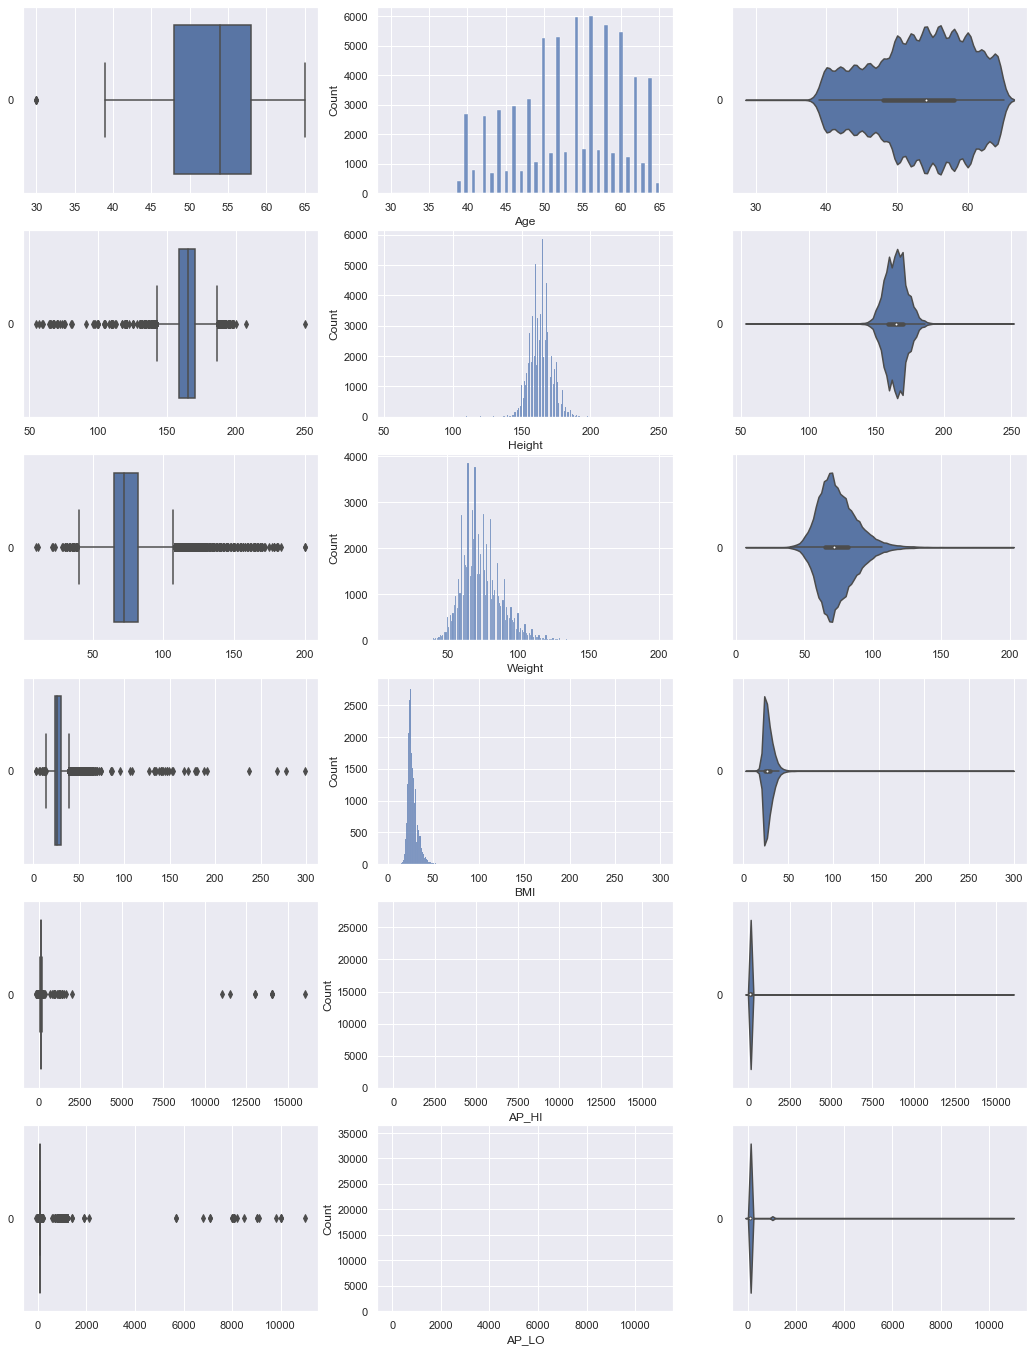

In [12]:
# eyepower to get general idea
# takes awhile to plot because we have 70k rows of data
# dk why AP_HI and AP_LO are blank
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_DF:
    sb.boxplot(data = numeric_DF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_DF[var], ax = axes[count,1])
    sb.violinplot(data = numeric_DF[var], orient = "h", ax = axes[count,2])
    count += 1

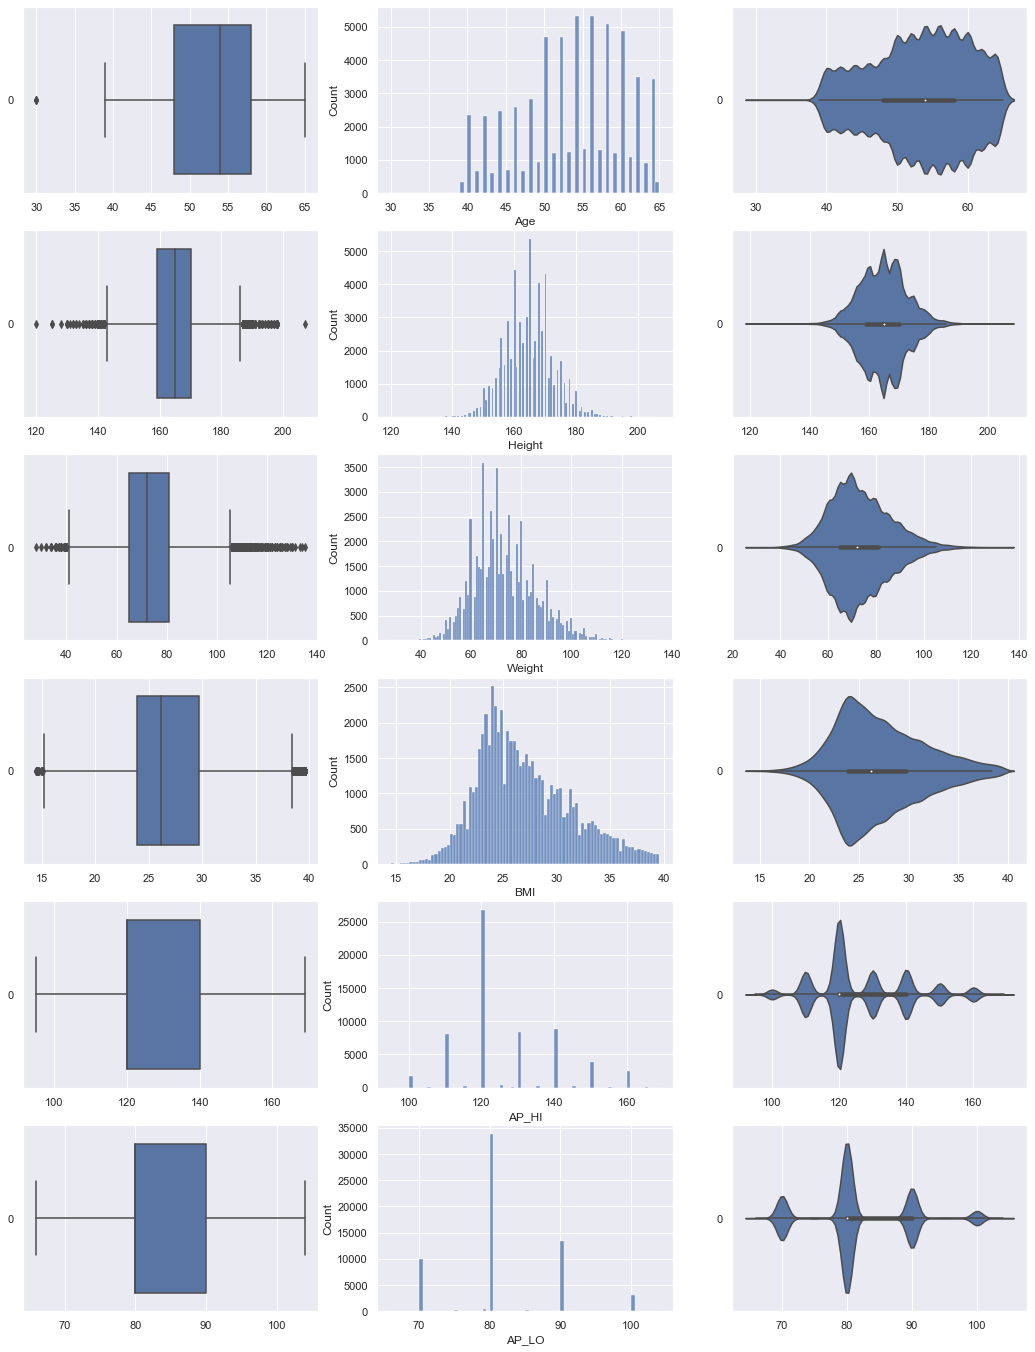

In [13]:

# cleaned data
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_DF_cleaned:
    sb.boxplot(data = numeric_DF_cleaned[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_DF_cleaned[var], ax = axes[count,1])
    sb.violinplot(data = numeric_DF_cleaned[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:>

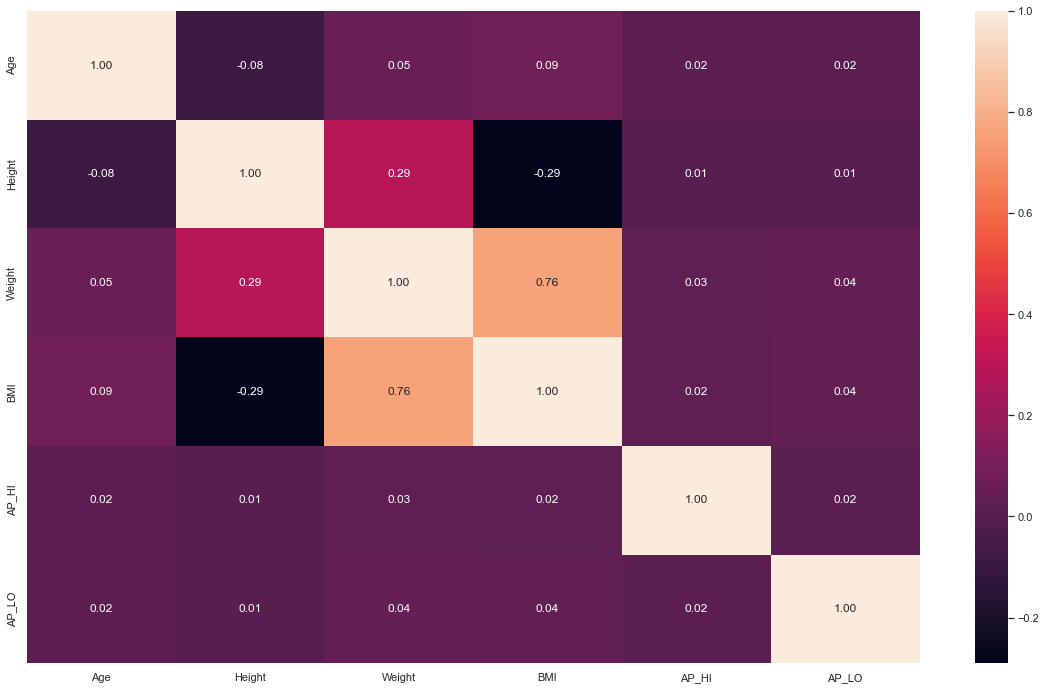

In [14]:
f = plt.figure(figsize=(20, 12))
sb.heatmap(numeric_DF.corr(), annot = True, fmt = ".2f")

# makes sense that they're mostly not correlated, because cardio is not included

In [15]:
numeric_DF.corr()

,Age,Height,Weight,BMI,AP_HI,AP_LO
Age,1.000000,-0.081456,0.053661,0.085423,0.020793,0.017754
Height,-0.081456,1.000000,0.290968,-0.290363,0.005488,0.006150
Weight,0.053661,0.290968,1.000000,0.762151,0.030702,0.043710
BMI,0.085423,-0.290363,0.762151,1.000000,0.024861,0.035350
AP_HI,0.020793,0.005488,0.030702,0.024861,1.000000,0.016086
AP_LO,0.017754,0.006150,0.043710,0.035350,0.016086,1.000000


In [16]:
numeric_DF.skew()

Age       -0.306444
Height    -0.642187
Weight     1.012070
BMI        7.725821
AP_HI     85.296214
AP_LO     32.114083
dtype: float64

In [17]:
# included cardio
# this dataframe is not used, just experimenting
numeric_DF_2 = pd.DataFrame(cardio_data[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO', 'Cardio']])
numeric_DF_2.head()

,Age,Height,Weight,BMI,AP_HI,AP_LO,Cardio
0,50,168,62.0,22.0,110,80,0
1,55,156,85.0,34.9,140,90,1
2,52,165,64.0,23.5,130,70,1
3,48,169,82.0,28.7,150,100,1
4,48,156,56.0,23.0,100,60,0


In [18]:
numeric_DF_2.corr()

,Age,Height,Weight,BMI,AP_HI,AP_LO,Cardio
Age,1.000000,-0.081456,0.053661,0.085423,0.020793,0.017754,0.237749
Height,-0.081456,1.000000,0.290968,-0.290363,0.005488,0.006150,-0.010821
Weight,0.053661,0.290968,1.000000,0.762151,0.030702,0.043710,0.181660
BMI,0.085423,-0.290363,0.762151,1.000000,0.024861,0.035350,0.165646
AP_HI,0.020793,0.005488,0.030702,0.024861,1.000000,0.016086,0.054475
AP_LO,0.017754,0.006150,0.043710,0.035350,0.016086,1.000000,0.065719
Cardio,0.237749,-0.010821,0.181660,0.165646,0.054475,0.065719,1.000000


In [19]:
# categorical columns
cat_DF = pd.DataFrame(cardio_data[['Gender', 'Chol', 'Gluc', 'Smoke', 'Alco', 'Active', 'Cardio']])
cat_DF.head()

,Gender,Chol,Gluc,Smoke,Alco,Active,Cardio
0,M,N,N,0,0,1,0
1,F,H,N,0,0,1,1
2,F,H,N,0,0,0,1
3,M,N,N,0,0,1,1
4,F,N,N,0,0,0,0


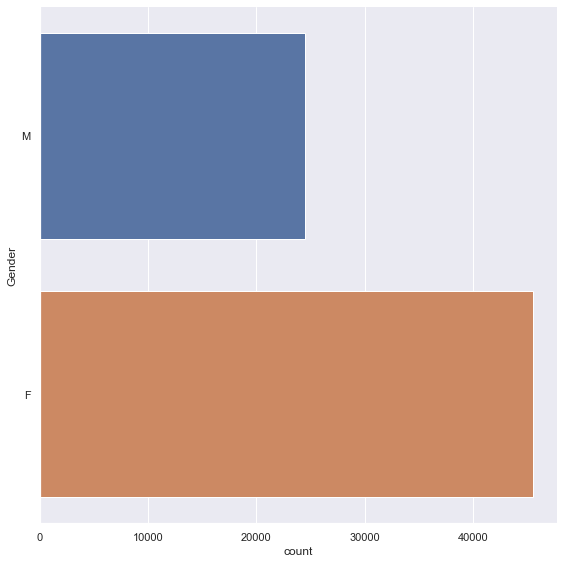

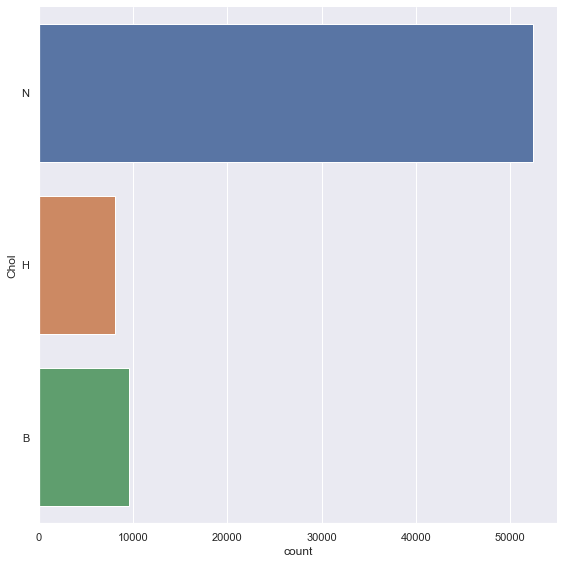

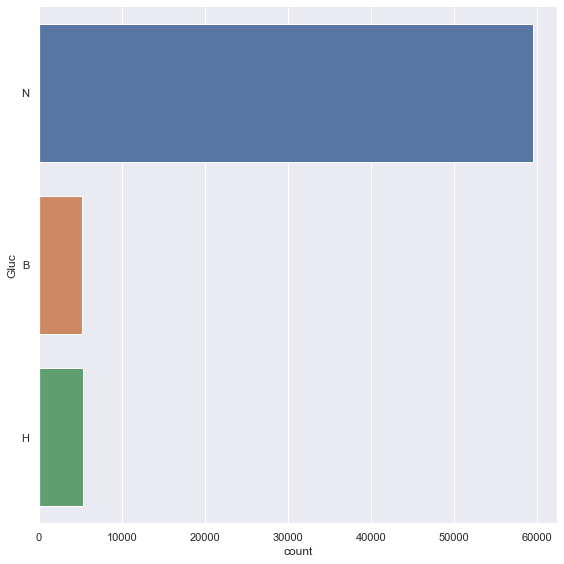

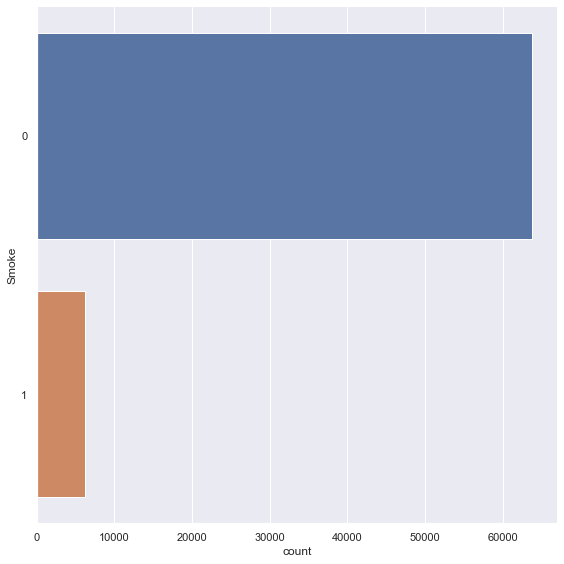

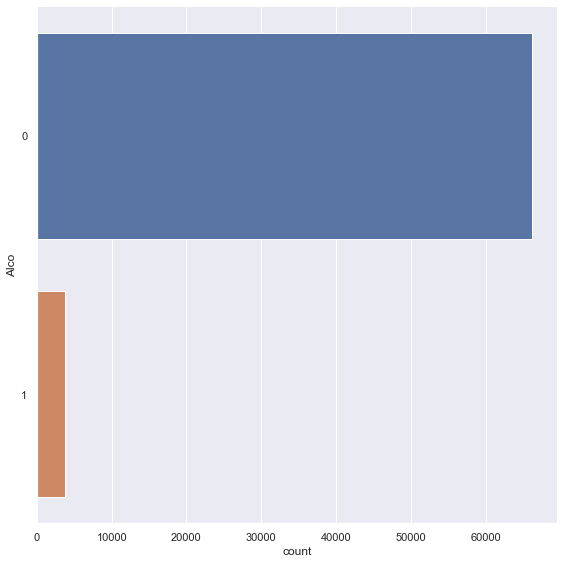

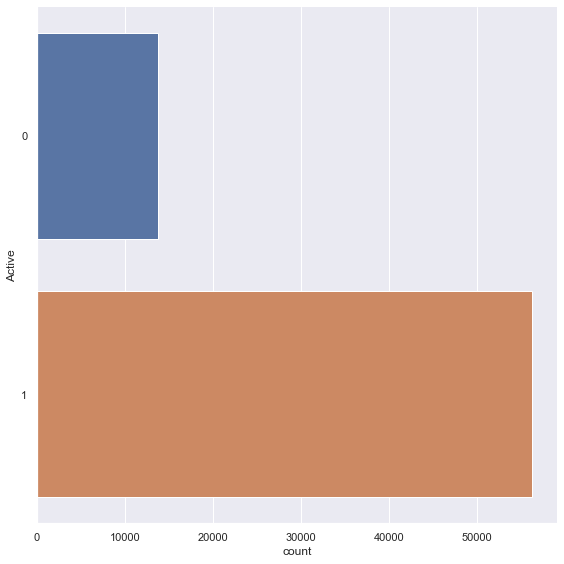

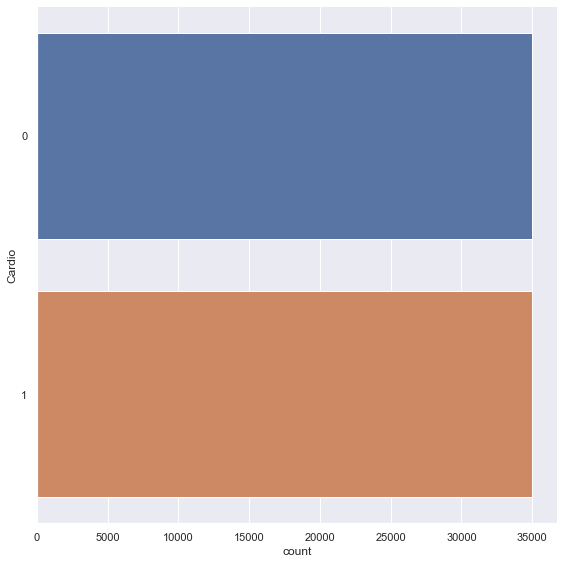

In [20]:
# cat plots
for var in cat_DF:
    sb.catplot(y = var, data = cat_DF, kind = "count", height = 8)

In [25]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# code taken from https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# Extract Response and Predictors
y = pd.DataFrame(no_outlier["Cardio"])
X = pd.DataFrame(no_outlier[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# using logistic regression, cant use linear regression
logreg = LogisticRegression

logreg.fit(X_train, y_train.values.ravel()) # need .values.ravel()

print('Intercept of Regression \t: b = ', logreg.intercept_)
print('Coefficients of Regression \t: a = ', logreg.coef_)
print()

# Predict for test data
y_pred = logreg.predict(X_test)

# Plot the Predictions vs the True values
# i think need to use catplot instead of scatter?
# i've tried to use scatterplot, but failed
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# explained variance ~0.7, i think it's not bad?? maybe classification tree may be better at predicting

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

from sklearn import metrics

# confusion matrix
# TN FP
# FN TP
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

SyntaxError: invalid syntax (Temp/ipykernel_12576/4008103628.py, line 17)